In [1]:
# imports 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import os

# Proteomics

In [51]:
# set wd
os.chdir("/ix/djishnu/Aaron_F/PGM_project/TLR_data")

In [52]:
# load data
prot_df = pd.read_csv('/ix/djishnu/Aaron_F/PGM_project/TLR_data/Results/KLA_results_phosphosite_expression_adj.pval_0.05.csv', header=0, index_col=0)
psite_map_df = pd.read_csv('/ix/djishnu/Aaron_F/PGM_project/TLR_data/TLR_psites_mapped.csv', header=0, index_col=0)

print(prot_data_df.shape)
print(psite_map_df.shape)

# # remove unknown gene
# psite_map_df = psite_map_df.drop(prot_data_df.index[np.where(prot_data_df.isna())[0]])
# prot_data_df = prot_data_df.drop(prot_data_df.index[np.where(prot_data_df.isna())[0]])

# print(prot_data_df.shape)
# print(psite_map_df.shape)

(4929, 11)
(4929, 1)


In [53]:
# need to deal with nan vals
prot_df = prot_df.fillna(0)

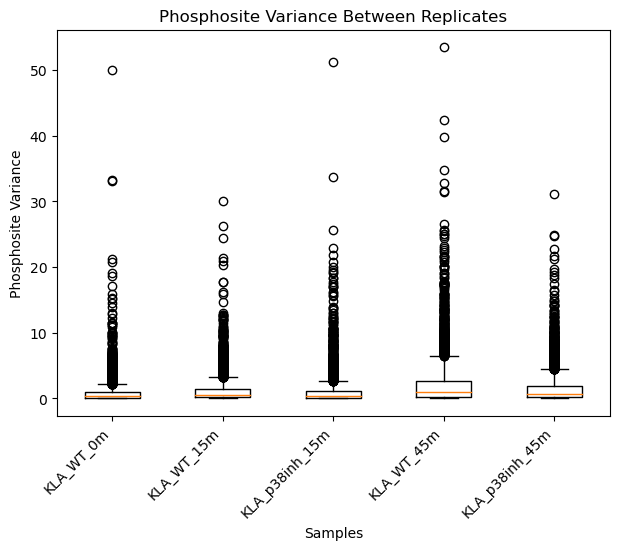

In [56]:
col_comparisons = [(0,1), (2,3,4),(5,6),(7,8),(9,10)]
sample_names = ["KLA_WT_0m", "KLA_WT_15m", "KLA_p38inh_15m", "KLA_WT_45m", "KLA_p38inh_45m"]
variances_data = []
above_var_thresh = {}
perc_thresh = 0.80
for i, cols in enumerate(col_comparisons):
    row_variances = prot_df.iloc[:, list(cols)].var(axis=1)
    variances_data.append(row_variances)
    
    # get psites below variance threshold for each set of samples
    threshold = row_variances.quantile(perc_thresh)
    psites_above = row_variances[row_variances > threshold].index
    above_var_thresh[sample_names[i]] = psites_above.tolist()

# Plot box plot of variances for each set
plt.boxplot(variances_data, labels=[f'{sample_names[i]}' for i in range(len(sample_names))])
plt.xlabel('Samples')
plt.ylabel('Phosphosite Variance')
plt.title('Phosphosite Variance Between Replicates')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.savefig('phosphosite_sample_variances.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [57]:
# remove high var p-sites
high_var_psites = []
for key, val in above_var_thresh.items():
    high_var_psites = high_var_psites + val
len(list(set(high_var_psites)))


2803

In [58]:
reduced_prot_df = prot_df.copy()
reduced_prot_df = reduced_prot_df.loc[~reduced_prot_df.index.isin(high_var_psites),]
reduced_prot_df.shape

(2126, 11)

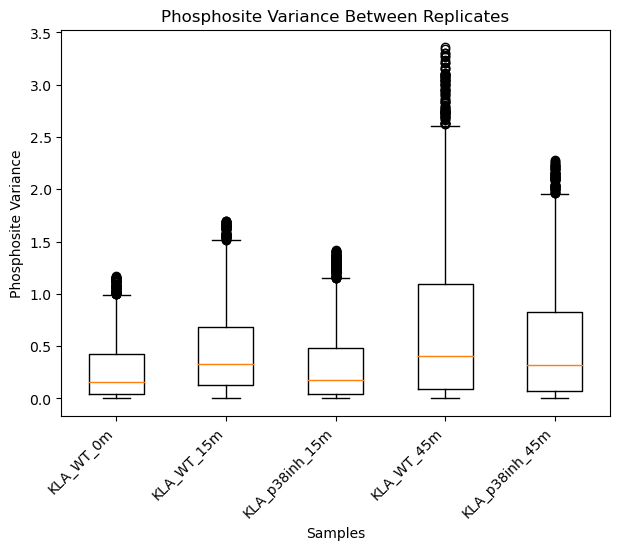

In [59]:
col_comparisons = [(0,1), (2,3,4),(5,6),(7,8),(9,10)]
sample_names = ["KLA_WT_0m", "KLA_WT_15m", "KLA_p38inh_15m", "KLA_WT_45m", "KLA_p38inh_45m"]
variances_data = []
for i, cols in enumerate(col_comparisons):
    row_variances = reduced_prot_df.iloc[:, list(cols)].var(axis=1)
    variances_data.append(row_variances)

# Plot box plot of variances for each set
plt.boxplot(variances_data, labels=[f'{sample_names[i]}' for i in range(len(sample_names))])
plt.xlabel('Samples')
plt.ylabel('Phosphosite Variance')
plt.title('Phosphosite Variance Between Replicates')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.savefig('reduced_phosphosite_sample_variances.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [50]:
reduced_prot_df.to_csv("reduced_proteomics_adj.pval_0.05_varThresh_0.80.csv",header=True, index=True)